In [1]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Machine Learning/model_train/DIA/news_uk_dataset.csv")


In [6]:
data.columns

Index(['title', 'published', 'source', 'category'], dtype='object')

In [2]:
data.head()

,title,published,source,category
0,"The gift of Gabby: Gabby Logan on politics, mo...","Mon, 11 Jan 2010 08:00:00 GMT",www.independent.co.uk,Politics
1,Politics is full of slippery evasive liars: Af...,"Tue, 26 Jan 2010 08:00:00 GMT",www.dailymail.co.uk,Politics
2,BBC Comedy Blog: Mark Watson responds to Polit...,"Fri, 15 Jan 2010 08:00:00 GMT",www.bbc.co.uk,Politics
3,German politics set for shake-up as cancer for...,"Tue, 26 Jan 2010 08:00:00 GMT",www.independent.co.uk,Politics
4,The Big Question: What is the Tea Party moveme...,"Fri, 22 Jan 2010 08:00:00 GMT",www.independent.co.uk,Politics


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('published').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['published'].value_counts()
    for x_label, grp in _df_3.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('published')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['source'].value_counts()
    for x_label, grp in _df_4.groupby('published')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('published')
_ = plt.ylabel('source')

In [3]:
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.linear_model import  LogisticRegression

In [28]:
X,y = data.title,data.category
X.head(),y.head()

(0    The gift of Gabby: Gabby Logan on politics, mo...
 1    Politics is full of slippery evasive liars: Af...
 2    BBC Comedy Blog: Mark Watson responds to Polit...
 3    German politics set for shake-up as cancer for...
 4    The Big Question: What is the Tea Party moveme...
 Name: title, dtype: object,
 0    Politics
 1    Politics
 2    Politics
 3    Politics
 4    Politics
 Name: category, dtype: object)

In [36]:
data.category.nunique()

14

In [37]:
data.category.unique()

array(['Politics', 'Travel', 'Sports', 'Crime', 'Education', 'Economy',
       'Entertainment', 'Technology', 'Culture', 'International',
       'Science', 'Health', 'Environment', 'Police'], dtype=object)

In [38]:
data.category.value_counts()

category
Police           8917
Crime            6714
Travel           6479
Health           6422
Education        5195
Sports           5027
Entertainment    5018
Politics         4478
International    4408
Science          4327
Culture          3267
Environment      3197
Economy          3179
Technology       2960
Name: count, dtype: int64

<Axes: xlabel='category'>

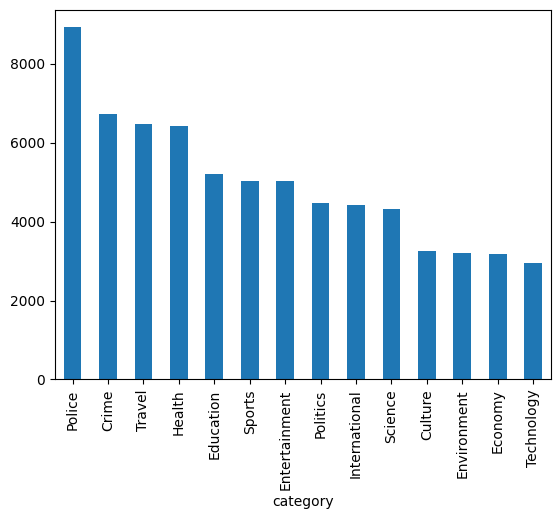

In [39]:
data.category.value_counts().plot(kind='bar')

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(max_features=1000)
transformed_data_X = vector.fit_transform(X)
transformed_data_X.shape,transformed_data_X[0:10]

((69588, 1000),
 <10x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 77 stored elements in Compressed Sparse Row format>)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y[:10]

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(transformed_data_X, y, test_size=0.2, random_state=42)

In [43]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [44]:
model.score(X_test, y_test)

0.8906452076447765

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf = confusion_matrix(y_test, model.predict(X_test))
cf


array([[1237,    1,    4,    1,    6,    6,    8,    5,   59,   10,    4,
           0,    2,   19],
       [   6,  562,    2,    1,    6,   10,   10,    2,    1,    4,    6,
           2,    2,    5],
       [   7,    1,  531,    4,    3,   15,   14,    4,    2,   28,    9,
           0,    3,    3],
       [   5,    3,    5,  955,    5,   12,   23,    5,    4,   14,   16,
           6,    3,    4],
       [   5,    1,    0,    3,  901,    2,    5,    1,    4,   13,    9,
           9,    2,   15],
       [   7,    1,    2,    5,    4,  534,   30,    5,    2,   17,   38,
           2,    4,    6],
       [   2,    1,    6,   27,    6,   33, 1161,    5,    5,   19,   16,
           2,   11,   13],
       [   5,    3,    4,    8,    2,   14,   12,  811,    2,   13,   11,
           1,    1,   25],
       [  82,    4,    0,    2,    5,    7,   14,    4, 1627,    6,    5,
           2,    4,    9],
       [   7,    4,   12,    7,   14,   12,   14,    6,    2,  770,   22,
           2,    

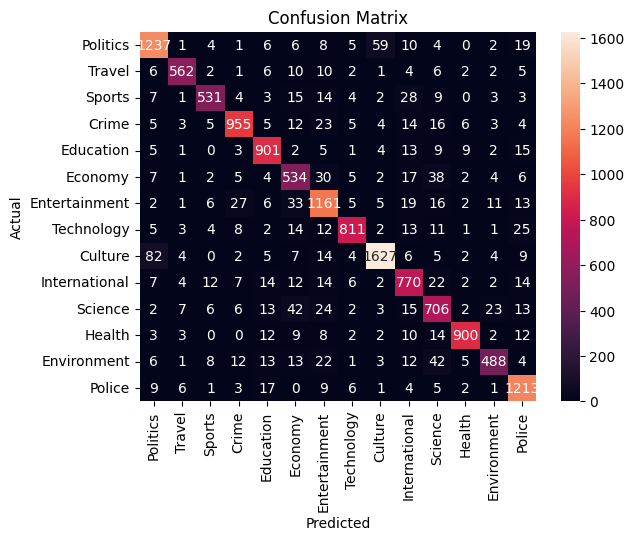

In [59]:
sns.heatmap(cf, annot=True, fmt='d',xticklabels=data.category.unique(), yticklabels=data.category.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

An error occurred: no display name and no $DISPLAY environment variable
